<img src = "./wow.png" style="width: 40px;"/> 
## DropRate WoW 

#### Quantas tentativas devo esperar para conseguir a montaria dos meus sonhos?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
c = np.arange(0.25,100.25,0.25) #Lista de 0 a 100 ao passo 0.25 para termos precisao da % de sucesso

In [3]:
def pelo_menos_1_sucesso(tentativas,fracasso):
    '''
    Dado o n° tentativas e a probabilidade de fracasso, retorna o valor da probabilidade de 
    pelo menos 1 sucesso em %.
    '''
    fracasso_total = fracasso**tentativas
    return (1-fracasso_total)*100

def qts_tentativas(fracasso,tentativas):
    '''
    Função recebe a probabilidade de fracasso e o numero de tentativas.
    Retorna lista com as probabilidades de se ter PELO MENOS 1 sucesso entre 1~quant. tentativas
    '''
    l=[]
    for i in range(tentativas):
        l.append(pelo_menos_1_sucesso(i,fracasso))
    return l

def tentativa_max(lista,n):
    '''
    Função que recebe lista de probabilidades e a n% minima.
    Retorna a tentativa mínima para que se tenha PELO MENOS 1 sucesso com n% de certeza
    '''
    for i in range(len(lista)):
        if lista[i]>n:
            return i
            break

def chance_sucessoVelho(sucesso,jogadores):
    
    '''
    Função que recebe a prob(sucesso) de drop e a quantidade de jogadores simulados.
    Retorna uma lista com o numero de elementos equivalente ao da quant de jogadores,
    mostrando quantas tentativas foram necessárias para haver o primeiro sucesso. 
    Considera chance de sucesso padrão de 5%. Recebe a chance de sucesso em DECIMAL.
    '''
    l=[]
    tentativas = 1
    while tentativas < jogadores and len(l) < jogadores:
        if random.choice(c) <= (sucesso*100): # Se o numero escolhido randomicamente entre 100 for menor ou igual a chance de sucesso em %, resulta em sucesso!
            l.append(tentativas)
            tentativas = 1
        else:
            tentativas += 1
    return l

def chance_sucesso(sucesso,jogadores):
    
    '''
    Função que recebe a prob(sucesso) de drop e a quantidade de jogadores simulados.
    Retorna uma lista com o numero de elementos equivalente ao da quant de jogadores,
    mostrando quantas tentativas foram necessárias para haver o primeiro sucesso. 
    Considera chance de sucesso padrão de 5%. Recebe a chance de sucesso em DECIMAL.
    '''
    l=[]
    tentativas = 1
    while len(l) < jogadores:
        if random.choice(c) <= (sucesso*100): # Se o numero escolhido randomicamente entre 100 for menor ou igual a chance de sucesso em %, resulta em sucesso!
            l.append(tentativas)
            tentativas = 1
        else:
            tentativas += 1
    return l

 - Geralmente as montarias mais legais possuem chance de drop 1~5%. Vamos analisar algumas coisas:

#### Simulacao 1: Montaria com 5% de droprate, amostragem de 1.000 jogadores

In [4]:
simulacao_1 = pd.Series(chance_sucesso(0.05,1000)) #5% drop, 1000 jogadores
simulacao_1.describe()

count    1000.000000
mean       19.931000
std        18.997187
min         1.000000
25%         6.000000
50%        14.000000
75%        27.000000
max       140.000000
dtype: float64

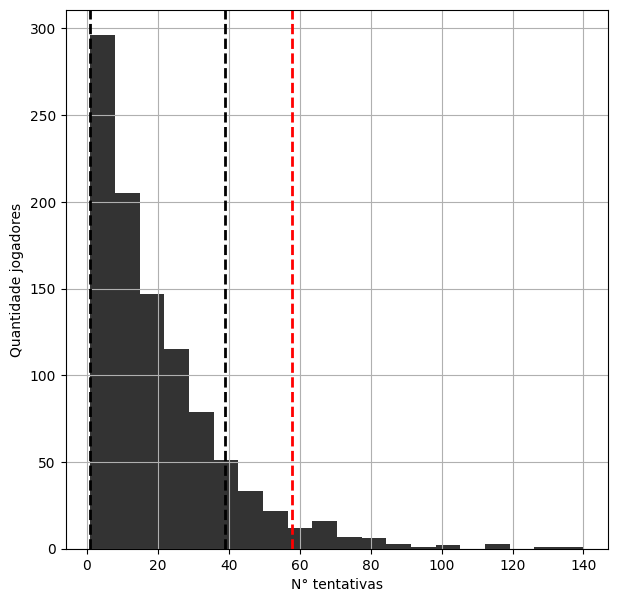

In [5]:
#A cada 1000 jogadores, quantos conseguirão o drop em quantas tentativas? 
simulacao_1.hist(color="k", alpha=0.8, bins=20, figsize=[7,7])
plt.axvline(simulacao_1.mean()-simulacao_1.std(), color='k', ls='--', lw=2) #Engloba 68% da população
plt.axvline(simulacao_1.mean()+simulacao_1.std(), color='k', ls='--', lw=2) #Engloba 68% da população
plt.axvline(simulacao_1.mean()+2*simulacao_1.std(), color='r', ls='--', lw=2) #Engloba 95% da população
plt.xlabel('N° tentativas')
plt.ylabel('Quantidade jogadores')
plt.show()

 - Aplicando Teorema Central do Limite:

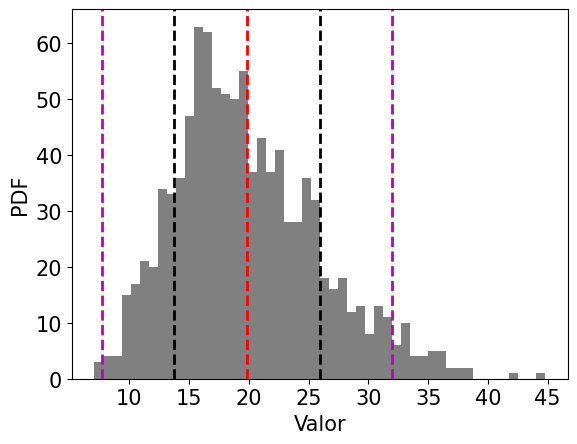

68% da populacao está dentro das 13.77~25.92 tentativas
95% da populacao está dentro das 7.7~32.0 tentativas
Média: 19.85
Desvio: 6.07


In [9]:
n = 10
nova_distribuicao = np.array([])

for i in range(len(simulacao_1)):
    indices = np.random.randint(0, len(simulacao_1), n)
    nova_distribuicao = np.append(nova_distribuicao, simulacao_1[indices].mean())

plt.hist(nova_distribuicao, color='gray', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axvline(nova_distribuicao.mean(), color='r', ls='--', lw=2) #Mèdia
plt.axvline(nova_distribuicao.mean()-nova_distribuicao.std(), color='k', ls='--', lw=2) #Engloba 68% da população
plt.axvline(nova_distribuicao.mean()+nova_distribuicao.std(), color='k', ls='--', lw=2) #Engloba 68% da população
plt.axvline(nova_distribuicao.mean()+2*nova_distribuicao.std(), color='m', ls='--', lw=2) #Engloba 95% da população
plt.axvline(nova_distribuicao.mean()-2*nova_distribuicao.std(), color='m', ls='--', lw=2) #Engloba 95% da população
plt.show()

print(f"68% da populacao está dentro das {round(nova_distribuicao.mean()-1*nova_distribuicao.std(),2)}~{round(nova_distribuicao.mean()+1*nova_distribuicao.std(),2)} tentativas")
print(f"95% da populacao está dentro das {round(nova_distribuicao.mean()-2*nova_distribuicao.std(),2)}~{round(nova_distribuicao.mean()+2*nova_distribuicao.std(),2)} tentativas")
print(f"Média: {round(nova_distribuicao.mean(),2)}\nDesvio: {round(nova_distribuicao.std(),2)}")

Perceba o tamanho do desvio e os valores dos quartis da nossa gaussiana para n pequeno.

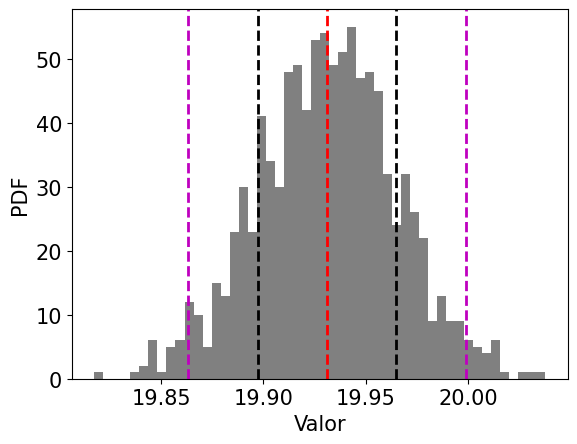

68% da populacao está dentro das 19.9~19.97 tentativas
95% da populacao está dentro das 19.86~20.0 tentativas
Média: 19.93
Desvio: 0.03


In [10]:
n = 300000
nova_distribuicao = np.array([])

for i in range(len(simulacao_1)):
    indices = np.random.randint(0, len(simulacao_1), n)
    nova_distribuicao = np.append(nova_distribuicao, simulacao_1[indices].mean())

plt.hist(nova_distribuicao, color='gray', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim(0,70)
plt.xlim(0,140)
plt.axvline(nova_distribuicao.mean(), color='r', ls='--', lw=2) #Mèdia
plt.axvline(nova_distribuicao.mean()-nova_distribuicao.std(), color='k', ls='--', lw=2) #Engloba 68% da população
plt.axvline(nova_distribuicao.mean()+nova_distribuicao.std(), color='k', ls='--', lw=2) #Engloba 68% da população
plt.axvline(nova_distribuicao.mean()+2*nova_distribuicao.std(), color='m', ls='--', lw=2) #Engloba 95% da população
plt.axvline(nova_distribuicao.mean()-2*nova_distribuicao.std(), color='m', ls='--', lw=2) #Engloba 95% da população
plt.show()

print(f"68% da populacao está dentro das {round(nova_distribuicao.mean()-1*nova_distribuicao.std(),2)}~{round(nova_distribuicao.mean()+1*nova_distribuicao.std(),2)} tentativas")
print(f"95% da populacao está dentro das {round(nova_distribuicao.mean()-2*nova_distribuicao.std(),2)}~{round(nova_distribuicao.mean()+2*nova_distribuicao.std(),2)} tentativas")
print(f"Média: {round(nova_distribuicao.mean(),2)}\nDesvio: {round(nova_distribuicao.std(),2)}")

In [20]:
maxx = simulacao_1.max()

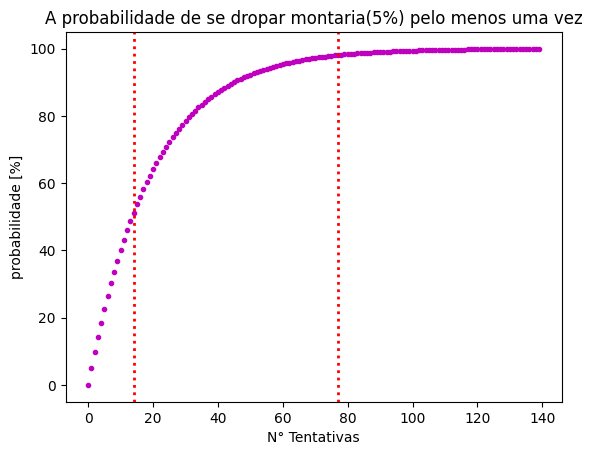

A partir de 14 tentativas, temos probabilidade de sucesso acima de 50%.

A partir de 77 tentativas, temos probabilidade próxima dos 100% de sucesso.


In [21]:
# Usando o N° max de tentativas visto na simulacao p limitar nosso grafico
cinc = tentativa_max(qts_tentativas(0.95,maxx),50) 
cem = tentativa_max(qts_tentativas(0.95,maxx),98)


plt.title('A probabilidade de se dropar montaria(5%) pelo menos uma vez')
plt.plot(range(maxx), qts_tentativas(0.95,maxx),'m.') # N° max visto na simulacao
plt.xlabel('N° Tentativas')
plt.ylabel('probabilidade [%]')
#plt.axhline(50, color='y', linestyle='dotted', linewidth=2) # probabilidade que julgo aceitavel
plt.axvline(cinc, color='r', linestyle='dotted', linewidth=2) # tentativas para a prob(aceitavel)
plt.axvline(cem, color='r', linestyle='dotted', linewidth=2) # tentativas para a prob(suesso) ser quase certa
plt.show()
print('A partir de '+str(cinc)+' tentativas, temos probabilidade de sucesso acima de 50%.\n')
print('A partir de '+str(cem)+' tentativas, temos probabilidade próxima dos 100% de sucesso.')

#### Simulacao 2: Montaria com 2% de droprate, amostragem de 10.000 jogadores

In [22]:
simulacao_2 = pd.Series(chance_sucesso(0.02,10000)) 
simulacao_2.describe()

count    10000.000000
mean        49.739700
std         49.667529
min          1.000000
25%         14.000000
50%         34.000000
75%         70.000000
max        493.000000
dtype: float64

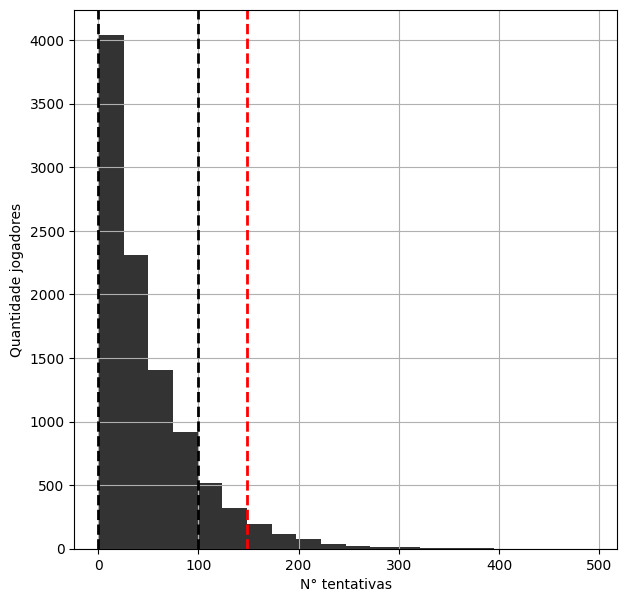

In [23]:
#A cada 10000 jogadores, quantos conseguirão o drop em quantas tentativas? 
simulacao_2.hist(color="k", alpha=0.8, bins=20, figsize=[7,7])
plt.axvline(simulacao_2.mean()-simulacao_2.std(), color='k', ls='--', lw=2) #Engloba 68% da população
plt.axvline(simulacao_2.mean()+simulacao_2.std(), color='k', ls='--', lw=2) #Engloba 68% da população
plt.axvline(simulacao_2.mean()+2*simulacao_2.std(), color='r', ls='--', lw=2) #Engloba 95% da população
plt.xlabel('N° tentativas')
plt.ylabel('Quantidade jogadores')
plt.show()

In [24]:
maxx = simulacao_2.max()

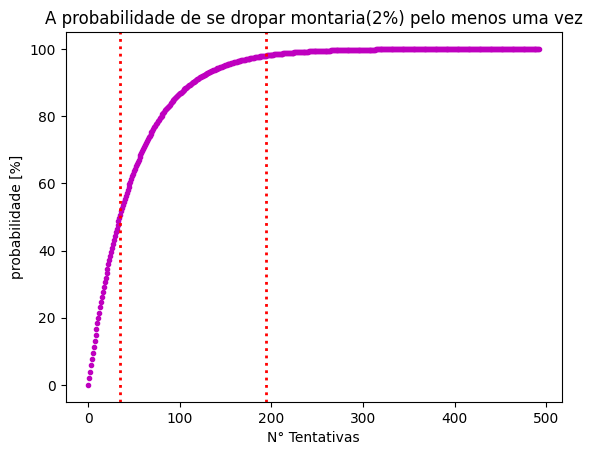

A partir de 35 tentativas, temos probabilidade de sucesso acima de 50%.

A partir de 194 tentativas, temos probabilidade próxima dos 100% de sucesso.


In [25]:
# Usando o N° max de tentativas visto na simulacao p limitar nosso grafico
cinc = tentativa_max(qts_tentativas(0.98,maxx),50) 
cem = tentativa_max(qts_tentativas(0.98,maxx),98)


plt.title('A probabilidade de se dropar montaria(2%) pelo menos uma vez')
plt.plot(range(maxx), qts_tentativas(0.98,maxx),'m.') # N° max visto na simulacao
plt.xlabel('N° Tentativas')
plt.ylabel('probabilidade [%]')
#plt.axhline(50, color='y', linestyle='dotted', linewidth=2) # probabilidade que julgo aceitavel
plt.axvline(cinc, color='r', linestyle='dotted', linewidth=2) # tentativas para a prob(aceitavel)
plt.axvline(cem, color='r', linestyle='dotted', linewidth=2) # tentativas para a prob(suesso) ser quase certa
plt.show()
print('A partir de '+str(cinc)+' tentativas, temos probabilidade de sucesso acima de 50%.\n')
print('A partir de '+str(cem)+' tentativas, temos probabilidade próxima dos 100% de sucesso.')

#### Simulacao 3: Montaria com 1% de droprate, amostragem de 10.000 jogadores

In [26]:
simulacao_3 = pd.Series(chance_sucesso(0.01,10000)) 
simulacao_3.describe()

count    10000.000000
mean       101.063900
std         99.945648
min          1.000000
25%         29.000000
50%         70.000000
75%        142.000000
max        857.000000
dtype: float64

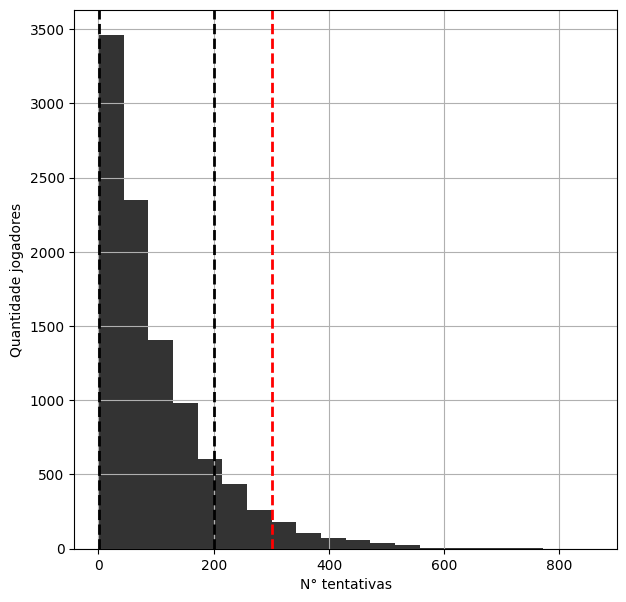

In [27]:
#A cada 10000 jogadores, quantos conseguirão o drop em quantas tentativas? 
simulacao_3.hist(color="k", alpha=0.8, bins=20, figsize=[7,7])
plt.axvline(simulacao_3.mean()-simulacao_3.std(), color='k', ls='--', lw=2) #Engloba 68% da população
plt.axvline(simulacao_3.mean()+simulacao_3.std(), color='k', ls='--', lw=2) #Engloba 68% da população
plt.axvline(simulacao_3.mean()+2*simulacao_3.std(), color='r', ls='--', lw=2) #Engloba 95% da população
plt.xlabel('N° tentativas')
plt.ylabel('Quantidade jogadores')
plt.show()

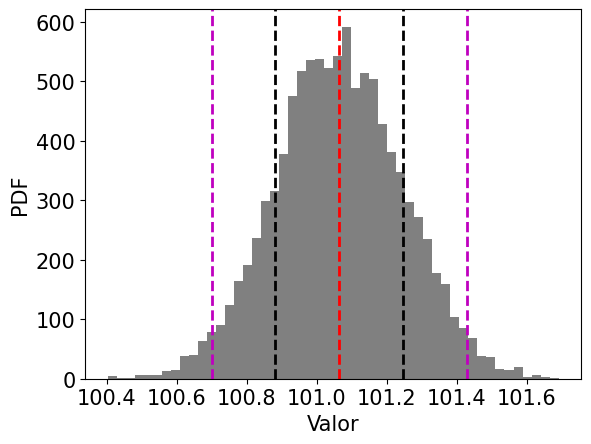

68% da populacao está dentro das 100.88~101.25 tentativas
95% da populacao está dentro das 100.7~101.43 tentativas
Média: 101.06
Desvio: 0.18


In [29]:
n = 300000
nova_distribuicao = np.array([])

for i in range(len(simulacao_3)):
    indices = np.random.randint(0, len(simulacao_3), n)
    nova_distribuicao = np.append(nova_distribuicao, simulacao_3[indices].mean())

plt.hist(nova_distribuicao, color='gray', bins=50)
plt.ylabel('PDF',fontsize=15)
plt.xlabel('Valor',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.axvline(nova_distribuicao.mean(), color='r', ls='--', lw=2) #Mèdia
plt.axvline(nova_distribuicao.mean()-nova_distribuicao.std(), color='k', ls='--', lw=2) #Engloba 68% da população
plt.axvline(nova_distribuicao.mean()+nova_distribuicao.std(), color='k', ls='--', lw=2) #Engloba 68% da população
plt.axvline(nova_distribuicao.mean()+2*nova_distribuicao.std(), color='m', ls='--', lw=2) #Engloba 95% da população
plt.axvline(nova_distribuicao.mean()-2*nova_distribuicao.std(), color='m', ls='--', lw=2) #Engloba 95% da população
plt.show()

print(f"68% da populacao está dentro das {round(nova_distribuicao.mean()-1*nova_distribuicao.std(),2)}~{round(nova_distribuicao.mean()+1*nova_distribuicao.std(),2)} tentativas")
print(f"95% da populacao está dentro das {round(nova_distribuicao.mean()-2*nova_distribuicao.std(),2)}~{round(nova_distribuicao.mean()+2*nova_distribuicao.std(),2)} tentativas")
print(f"Média: {round(nova_distribuicao.mean(),2)}\nDesvio: {round(nova_distribuicao.std(),2)}")

In [30]:
maxx = simulacao_3.max()

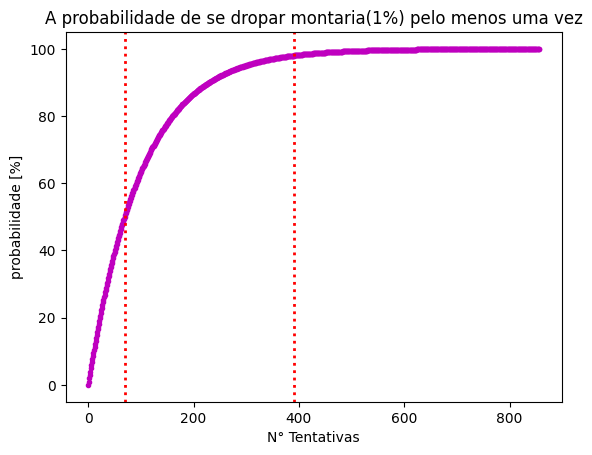

A partir de 69 tentativas, temos probabilidade de sucesso acima de 50%.

A partir de 390 tentativas, temos probabilidade próxima dos 100% de sucesso.


In [31]:
# Usando o N° max de tentativas visto na simulacao p limitar nosso grafico
cinc = tentativa_max(qts_tentativas(0.99,maxx),50) 
cem = tentativa_max(qts_tentativas(0.99,maxx),98)


plt.title('A probabilidade de se dropar montaria(1%) pelo menos uma vez')
plt.plot(range(maxx), qts_tentativas(0.99,maxx),'m.') # N° max visto na simulacao
plt.xlabel('N° Tentativas')
plt.ylabel('probabilidade [%]')
#plt.axhline(50, color='y', linestyle='dotted', linewidth=2) # probabilidade que julgo aceitavel
plt.axvline(cinc, color='r', linestyle='dotted', linewidth=2) # tentativas para a prob(aceitavel)
plt.axvline(cem, color='r', linestyle='dotted', linewidth=2) # tentativas para a prob(suesso) ser quase certa
plt.show()
print('A partir de '+str(cinc)+' tentativas, temos probabilidade de sucesso acima de 50%.\n')
print('A partir de '+str(cem)+' tentativas, temos probabilidade próxima dos 100% de sucesso.')

 - Lembrando: Cada evento é INDEPENDENTE. Ou seja, não significa que sua proxima tentativa terá 50% de chance, caso vc já tenha tentado 69 vezes. Sua proxima chance continuará sendo a % da mount (nesse caso, 1%). 
 - O que calculamos aqui é que a probabilidade de, em 69 tentativas, você ter dropado a montaria PELO MENOS 1 vez é de 50%. 

#### As montarias mais procuradas e raras:

 - Montarias como a Asatempéria Valarjar (5%) ficarão de fora pois já foram analisados.
 - As montarias que irei analisar serão:
 >>Serpente-guerreira Rajani -> exige escama de serpente que tem 2.34% drop
 
 >> Cinzas de Al'ar -> 1.7% drop
 
 >>Invencível -> 0.77% drop (wowhead dxa meio ambíguo esse drop, pode ser 1%)


Amostra de 1.000.000 de jogadores dessa vez! Vamos ver...

In [32]:
serpente_gue = pd.Series(chance_sucesso(0.0234,1000000)) 
serpente_gue.describe()

count    1000000.000000
mean          44.466209
std           43.946406
min            1.000000
25%           13.000000
50%           31.000000
75%           61.000000
max          670.000000
dtype: float64

In [33]:
cinzas_alar = pd.Series(chance_sucesso(0.017,1000000)) 
cinzas_alar.describe()

count    1000000.000000
mean          66.763309
std           66.219326
min            1.000000
25%           20.000000
50%           46.000000
75%           92.000000
max          959.000000
dtype: float64

In [34]:
invencivel = pd.Series(chance_sucesso(0.0077,1000000)) 
invencivel.describe()

count    1000000.000000
mean         133.275445
std          132.980848
min            1.000000
25%           39.000000
50%           93.000000
75%          184.000000
max         2069.000000
dtype: float64

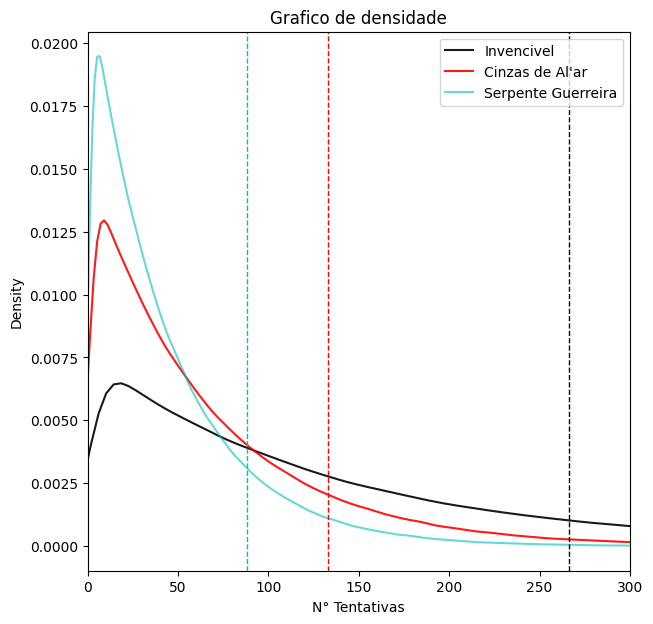

A Serpente Guerreira Rajani será dropada para 84% da populacao dentro de 88.41 tentativas

As Cinzas de Al'ar será dropada para 86% da populacao dentro de 132.98 tentativas

O invencivel será dropado para 80% da populacao dentro de 266.26 tentativas


In [37]:
ax = invencivel.plot.kde(color="k", alpha=0.9, figsize=[7,7])
ax2 = cinzas_alar.plot.kde(color="r", alpha=0.9, figsize=[7,7])
ax3 = serpente_gue.plot.kde(color="c", alpha=0.6, figsize=[7,7])
plt.title('Grafico de densidade')
plt.xlabel('N° Tentativas')
plt.legend(['Invencivel',"Cinzas de Al'ar",'Serpente Guerreira'])
plt.axvline(invencivel.mean()+invencivel.std(), color='k', ls='--', lw=1) # 80% da população
plt.axvline(cinzas_alar.mean()+cinzas_alar.std(), color='r', ls='--', lw=1)# 86% da população
plt.axvline(serpente_gue.mean()+serpente_gue.std(), color='c', ls='--', lw=1) # 84% da população
plt.xlim(0, +300)
plt.show()
print('A Serpente Guerreira Rajani será dropada para '+str(84)+'% da populacao dentro de '+str(round(serpente_gue.mean()+serpente_gue.std(),2))+' tentativas\n')
print("As Cinzas de Al'ar será dropada para "+str(86)+'% da populacao dentro de '+str(round(cinzas_alar.mean()+cinzas_alar.std(),2))+' tentativas\n')
print('O invencivel será dropado para '+str(80)+'% da populacao dentro de '+str(round(invencivel.mean()+invencivel.std(),2))+' tentativas')